In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn

# Práctica 4: Overfitting

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado se llama LDPA y puede leer su descripción en la siguiente liga

https://www.openml.org/d/1483

In [3]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(1483, download_data=False)

# Obtiene el nombre de la columna a predecir
target = dataset_info.default_target_attribute

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    categorical_mask, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

categorical_mask = np.array(categorical_mask)
columns = np.array(columns)

In [4]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")
print(f"Las características categóricas son {str(columns[categorical_mask])}")
print(f"Las características numéricas son {str(columns[~categorical_mask])}")

La columna a predecir se llama 'Class'
Todas las características son ['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7']
Las características categóricas son ['V1' 'V2']
Las características numéricas son ['V3' 'V4' 'V5' 'V6' 'V7']


In [5]:
# Impresión de las características
features

,V1,V2,V3,V4,V5,V6,V7
0,1,1,105794.0,105777.0,148933.0,108479.0,109365.0
1,1,4,105795.0,105778.0,155325.0,96952.0,161363.0
2,1,3,105796.0,105779.0,156652.0,101610.0,148870.0
3,1,1,105797.0,105780.0,149736.0,107135.0,102479.0
4,1,2,105798.0,105781.0,155978.0,125455.0,106203.0
...,...,...,...,...,...,...,...
164855,5,2,43687.0,43679.0,106611.0,123166.0,12432.0
164856,5,1,43688.0,43680.0,120821.0,119848.0,87463.0
164857,5,4,43689.0,43681.0,104999.0,110823.0,161536.0
164858,5,2,43690.0,43682.0,102191.0,112520.0,10811.0


In [6]:
outputs

0         3
1         3
2         3
3         3
4         3
         ..
164855    3
164856    3
164857    3
164858    3
164859    3
Name: Class, Length: 164860, dtype: category
Categories (11, object): ['1' < '2' < '3' < '4' ... '8' < '9' < '10' < '11']

A continuación se realiza la partición de __train__ y __test__. __No debe utilizar la partición de test por ningún motivo__.

In [7]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    features, 
    outputs, 
    test_size=0.5, 
    random_state=11
)

## Asignación 1 &#x1F921;

Utilizando las técnicas vistas en clase, realicé su mejor esfuerzo para obtener el mejor modelo lineal posible utilizando __únicamente el conjunto de entrenamiento__ (X_train y y_train). Puede utilizar bibliotecas, pero únicamente las técnicas vistas en clase y debe ir generando métricas o visualizaciones que respalden su toma de decisiones. Debe tener e imprimir una estimación de $E_{out}$ utilizando su conjunto de entrenamiento. La métrica utilizada será la entropía cruzada.

- **V1** = {A, B, C, D, E} = 5 people
- **V2** = {ANKLE_LEFT, ANKLE_RIGHT, CHEST, BELT}
- **V3** = timestamp (Numeric) all unique
- **V4** = date FORMAT (Date)
- **V5** = x coordinate of the tag (Numeric)
- **V6** = y coordinate of the tag (Numeric)
- **V7** = z coordinate of the tag (Numeric)
- **output** = activity = {'walking', 'falling', 'lying down', 'lying', 'sitting down', 'sitting', 'standing up from lying', 'on all fours', 'sitting on the ground', 'standing up from sitting', 'standing up from sitting on the ground'} (Nominal)

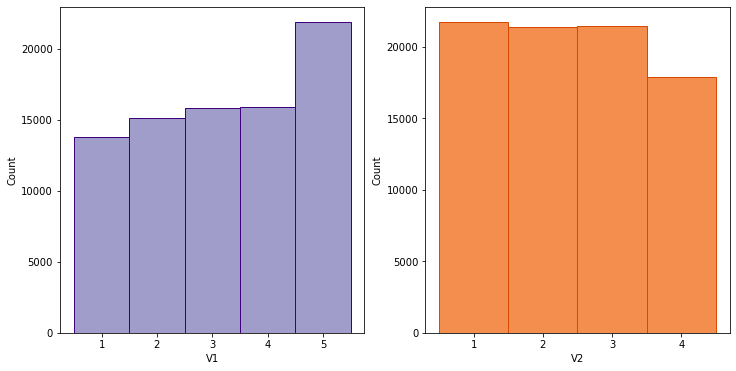

In [8]:
# Distribucion de las variables categoricas
columns = ["V1", "V2"]
colors = ["#807dba", "#f16913"]
edgecolors = ["#3f007d","#d94801"]
fig, axs = plt.subplots(ncols=2, nrows= 1, figsize=(12, 6))

for i, col in enumerate(columns):
    sns.histplot(data = X_train, x = col, ax = axs[i], color=colors[i], edgecolor=edgecolors[i])

<AxesSubplot:xlabel='Class', ylabel='Count'>

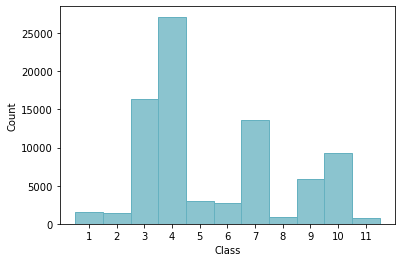

In [9]:
# Distribución del target
sns.histplot(x = y_train, color="#65B1C0",edgecolor="#65B1C0")

## EDA

In [10]:
# Calcular las skewness
def calc_skewness(x):
    return (((x - x.mean()) / (x.std())) ** 3).mean()

In [11]:
# Se plotea el histograma
def plot_hist(column):
    skewness = calc_skewness(column)
    __fig__, __axs__ = plt.subplots(ncols=1, figsize=(15, 5))
    __fig__.subplots_adjust(hspace=0.1, wspace=0.3)
    
    __axs__.set(title="Column (mean = {}, std = {}, skewness = {})".format(round(column.mean(), 2), round(column.std(), 2), round(skewness, 2)))
    _ = sns.histplot(x=column, ax=__axs__)
    _.axvline(x=column.mean(),
                color='blue',
                ls='--', 
                lw=2.5)

In [12]:
# Suma de los datos nulos
X_train.isnull().sum()

V1    0
V2    0
V3    0
V4    0
V5    0
V6    0
V7    0
dtype: int64

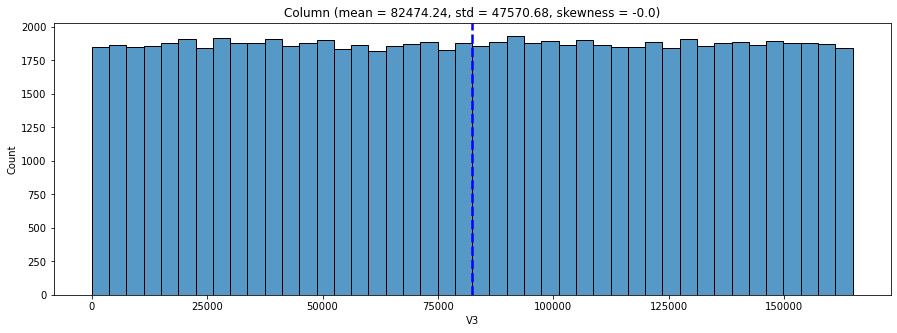

In [13]:
# Primer histograma
plot_hist(X_train.V3)

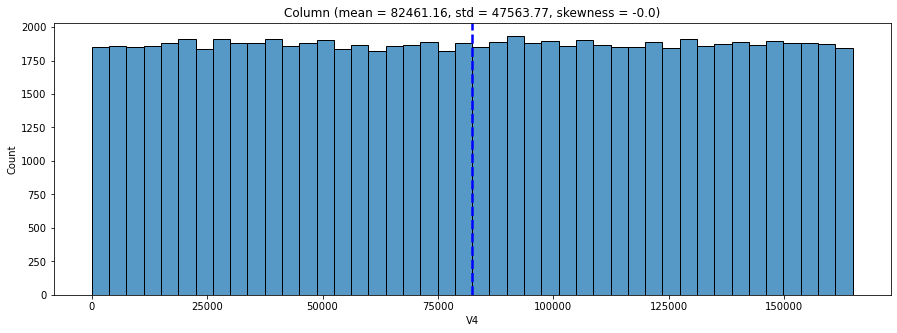

In [14]:
# Segundo histograma 
plot_hist(X_train.V4)

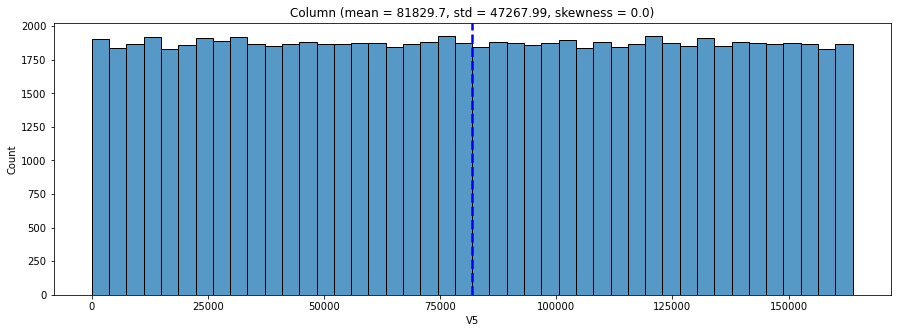

In [15]:
# Tercer histograma
plot_hist(X_train.V5)

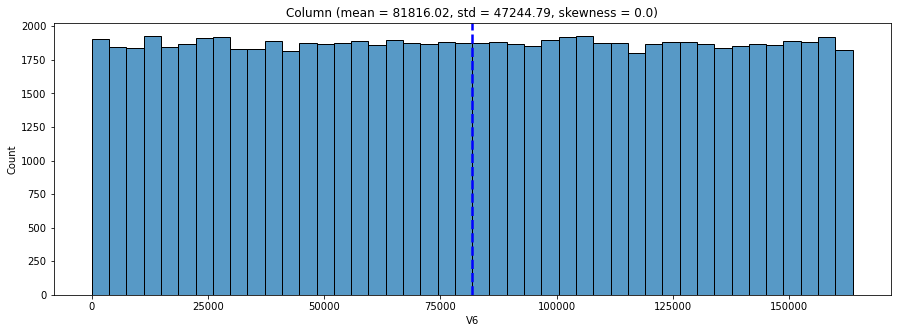

In [16]:
# Cuarto histograma
plot_hist(X_train.V6)

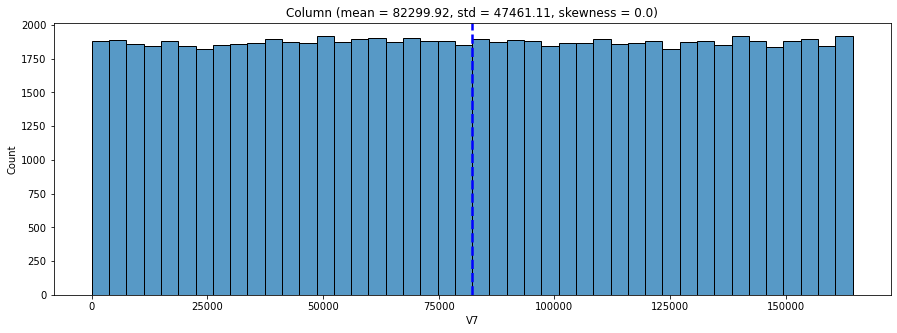

In [17]:
# Quinto histograma
plot_hist(X_train.V7)

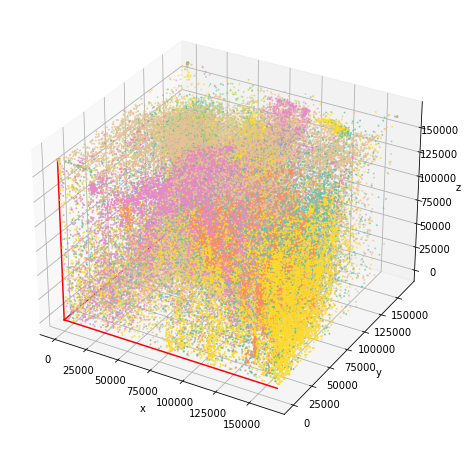

In [18]:
# Ya que las características están V5, V6 y V7 son coordenadas del sensor, podríamos ver cómo se comportan estos datos graficándolos tridimensionalmente.

fig = plt.figure(figsize=(8,8))

# Clasificamos los colores dependiendo de la acividad realizada
color=y_train.cat.codes
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['V5'], X_train['V6'], X_train['V7'], c=color, cmap="Set2_r", s=1)
 
xAxisLine = ((min(X_train['V5']), max(X_train['V5'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(X_train['V6']), max(X_train['V6'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(X_train['V7']), max(X_train['V7'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [19]:
# Correlación entre las características del X_train
corr_x = X_train.corr()
# Imprimimos las características que poseen mayor correlación
print(corr_x.abs().unstack().drop_duplicates().sort_values(ascending=False))

V3  V3    1.000000
    V4    1.000000
V5  V6    0.366917
V3  V5    0.090484
V4  V5    0.090482
    V7    0.026448
V3  V7    0.026448
V5  V7    0.026174
V4  V6    0.022802
V3  V6    0.022801
V6  V7    0.013580
dtype: float64


## Preprocesamiento

In [20]:
# Importamos lo necesario
import copy
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
def scale_features(X_train, X_test, to_scale):
    scaler = MinMaxScaler()
    scaler.fit(X_train[to_scale])
    train_scaled = scaler.transform(X_train[to_scale])
    test_scaled = scaler.transform(X_test[to_scale])
    
    return train_scaled, test_scaled

In [22]:
def ohe(df, columns):
    for column in columns:
        column_encoded = pd.get_dummies(pd.Series(df[column]))
        df[['{}_'.format(column) + str(c) for c in list(column_encoded.columns.values)]] = column_encoded
        df = df.drop(columns = column)
        
    return df

### Aplicamos OneHotEncoding

In [23]:
columns_to_encode = ['V1', 'V2']

In [24]:
X_train_ohe = ohe(copy.deepcopy(X_train), columns_to_encode)

In [25]:
X_train_ohe

,V3,V4,V5,V6,V7,V1_1,V1_2,V1_3,V1_4,V1_5,V2_1,V2_2,V2_3,V2_4
82677,158321.0,158297.0,72476.0,106489.0,146328.0,0,0,1,0,0,0,0,1,0
2843,108637.0,108619.0,135179.0,75851.0,79479.0,1,0,0,0,0,1,0,0,0
50670,98841.0,98825.0,76316.0,137080.0,101775.0,0,1,0,0,0,0,1,0,0
128441,7274.0,7273.0,97161.0,128160.0,137973.0,0,0,0,0,1,0,0,0,1
10592,116386.0,116368.0,70382.0,140689.0,119402.0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102327,56803.0,56792.0,146134.0,114564.0,47575.0,0,0,0,1,0,0,1,0,0
97617,52093.0,52085.0,54989.0,81198.0,26584.0,0,0,0,1,0,0,1,0,0
21584,127378.0,127358.0,44795.0,105412.0,49255.0,1,0,0,0,0,1,0,0,0
36543,84714.0,84700.0,59207.0,33106.0,114460.0,0,1,0,0,0,0,1,0,0


In [26]:
X_test_ohe = ohe(copy.deepcopy(X_test), columns_to_encode)

In [27]:
X_test_ohe

,V3,V4,V5,V6,V7,V1_1,V1_2,V1_3,V1_4,V1_5,V2_1,V2_2,V2_3,V2_4
9783,115577.0,115559.0,90402.0,18088.0,121817.0,1,0,0,0,0,0,0,0,1
85013,160657.0,160632.0,5651.0,148068.0,64938.0,0,0,1,0,0,0,0,0,1
70883,146527.0,146506.0,27276.0,100859.0,115620.0,0,0,1,0,0,1,0,0,0
64466,140110.0,140090.0,17717.0,63955.0,11320.0,0,0,1,0,0,0,1,0,0
82448,158092.0,158068.0,399.0,161841.0,163997.0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102897,57373.0,57362.0,64919.0,55294.0,68753.0,0,0,0,1,0,1,0,0,0
40732,88903.0,88889.0,34335.0,31755.0,72117.0,0,1,0,0,0,0,1,0,0
114945,69421.0,69407.0,23650.0,37747.0,133916.0,0,0,0,1,0,0,0,1,0
19389,125183.0,125165.0,123080.0,18023.0,89884.0,1,0,0,0,0,0,1,0,0


## Modelado y estimación de Error out (validación cruzada)

In [28]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss

### Automatización de validación cruzada para cierto modelo

In [29]:
from sklearn.pipeline import make_pipeline
def train_model(model, model_name, x_tr, y_tr, scoring):
    print(model_name)

    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_validate(model, x_tr, y_tr, cv=kfold, scoring=scoring)
    
    for i in range(len(scoring)):
        sc = scoring[i]
        msg = "Estimación de E_out (%s): promedio %f desv. std (%f)" % (sc, cv_results['test_' + sc].mean(), cv_results['test_' + sc].std())
        print(msg)
        print(cv_results['test_' + sc], '\n')

### Regresión logística

In [30]:
model_lr = linear_model.LogisticRegression(penalty = 'l2', max_iter = 1000, verbose = True)
pipeline = make_pipeline(MinMaxScaler(), model_lr)
model_name = 'Logistic Regression'
scoring = ['accuracy', 'neg_log_loss']
train_model(pipeline, model_name, X_train_ohe, y_train,  scoring)

Logistic Regression


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Estimación de E_out (accuracy): promedio 0.392163 desv. std (0.003013)
[0.3896033  0.39293946 0.39300012 0.38832949 0.39694286] 

Estimación de E_out (neg_log_loss): promedio -1.685052 desv. std (0.006966)
[-1.6842102  -1.69122611 -1.67836726 -1.69462091 -1.6768335 ] 



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.1s finished


In [31]:
pipeline.fit(X_train_ohe, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.9s finished


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, verbose=True))])

### Clasificador SGD

In [32]:
model_sgd_lr = linear_model.SGDClassifier(loss='log', penalty='l2', max_iter=1000, tol=1e-5)
pipeline_sgd = make_pipeline(MinMaxScaler(), model_sgd_lr)
model_name = 'SGD Classifier'
scoring = ['accuracy', 'neg_log_loss']
train_model(pipeline_sgd, model_name, X_train_ohe, y_train, scoring)

SGD Classifier
Estimación de E_out (accuracy): promedio 0.394274 desv. std (0.006344)
[0.39008856 0.39111974 0.38784423 0.39682155 0.40549557] 

Estimación de E_out (neg_log_loss): promedio -1.689213 desv. std (0.005495)
[-1.68738062 -1.69430103 -1.6863377  -1.69655256 -1.68149396] 



In [33]:
pipeline_sgd.fit(X_train_ohe, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdclassifier', SGDClassifier(loss='log', tol=1e-05))])

## Asignación 2 &#x1F921;

Evalue su modelo final en el conjunto de test (X_test y y_test). Su práctica será evaluada acorde a las técnicas aplicadas, la estimación de $E_{out}$, el valor de $E_{test}$, y contra las métricas obtenidas por sus compañeros.

### Regresión logística

In [34]:
# Predicción
pred_probs = pipeline.predict_proba(X_test_ohe)
pred = pipeline.predict(X_test_ohe)
# Scores
acc = accuracy_score(y_test, pred) * 100
log_losss = log_loss(y_test, pred_probs)
print('accuracy_score', acc, '\nlog_loss_score', log_losss)

accuracy_score 39.432245541671726 
log_loss_score 1.6867650653365824


In [35]:
print('Classification Report')
print(classification_report(y_test, pred))

Classification Report


C:\Users\viane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1476
          10       0.00      0.00      0.00      9086
          11       0.00      0.00      0.00       677
           2       0.00      0.00      0.00      1488
           3       0.39      0.34      0.36     16351
           4       0.39      0.75      0.52     27312
           5       0.00      0.00      0.00      3123
           6       0.31      0.17      0.22      2545
           7       0.43      0.34      0.38     13623
           8       0.00      0.00      0.00       854
           9       0.38      0.21      0.27      5895

    accuracy                           0.39     82430
   macro avg       0.17      0.17      0.16     82430
weighted avg       0.31      0.39      0.33     82430



C:\Users\viane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Clasificador SGD

In [36]:
# Prediccción
pred_probs = pipeline_sgd.predict_proba(X_test_ohe)
pred = pipeline_sgd.predict(X_test_ohe)
# Scores
acc = accuracy_score(y_test, pred) * 100
log_losss = log_loss(y_test, pred_probs)
print('accuracy_score', acc, '\nlog_loss_score', log_losss)

accuracy_score 40.17226737838166 
log_loss_score 1.6894172478901839


In [37]:
print('Classification Report')
print(classification_report(y_test, pred))

Classification Report


C:\Users\viane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1476
          10       0.00      0.00      0.00      9086
          11       0.00      0.00      0.00       677
           2       0.00      0.00      0.00      1488
           3       0.43      0.30      0.35     16351
           4       0.39      0.83      0.53     27312
           5       0.00      0.00      0.00      3123
           6       0.30      0.10      0.15      2545
           7       0.43      0.33      0.37     13623
           8       0.00      0.00      0.00       854
           9       0.50      0.12      0.20      5895

    accuracy                           0.40     82430
   macro avg       0.19      0.15      0.15     82430
weighted avg       0.33      0.40      0.33     82430



C:\Users\viane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
